In [22]:
from sklearn.cluster import KMeans
from skimage import io
import numpy as np

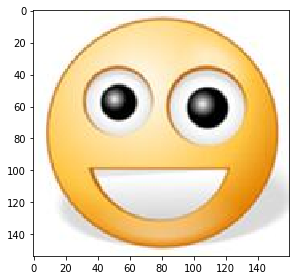

In [37]:
image = io.imread('test2.jpg')
io.imshow(image)
io.show()

In [24]:
# shape[0]：行，shape[1]：列，shape[2]：channel，图片通道数，1：表示黑白色，3：表示彩色（rgb）
image.shape

(154, 160, 3)

In [41]:
rows = image.shape[0]
cols = image.shape[1]
# image[0,0,:]：表示在第一个像素点的位置上的rgb取值，位置（0,0），reshape之后呢，位置变成（0）
image = image.reshape(rows*cols,3)
# n_init:每一次算法运行时开始的centroid seeds是随机生成的, 
# 这样得到的结果也可能有好有坏. 所以要运行算法n_init次, 取其中最好的（时间最短的）.
kmeans = KMeans(n_clusters=128,n_init=10,max_iter=200)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8)
labels = np.asarray(kmeans.labels_,dtype=np.uint8)
labels = labels.reshape(rows,cols)
print(clusters.shape)
np.save('codebook_test.npy',clusters)
io.imsave('compressed_test.jpg',labels)

(128, 3)


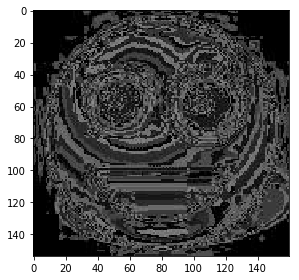

In [21]:
image = io.imread('compressed_test.jpg')
io.imshow(image)
io.show()

In [16]:
a = np.load('codebook_test.npy')
a.shape

(128, 3)

In [40]:
image[1,1,:]

array([255, 255, 255], dtype=uint8)